**Famous Companies Like Google, Amazon, Micosoft Stock Prices**

**Now, To Get Lastest Stock Prices of Those Companies We can also use yfinance package**

**Installing Packages and Importing Necessary packages and Libraries**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

**Importing The Data**

In [19]:
dataset_train = pd.read_csv('https://mjnvsai.github.io/StockPricePrediction/Google_Stock_Price_Train.csv')

In [20]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [21]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [22]:
training_set.shape

(1509, 1)

**Plotting Of Google Stocks**

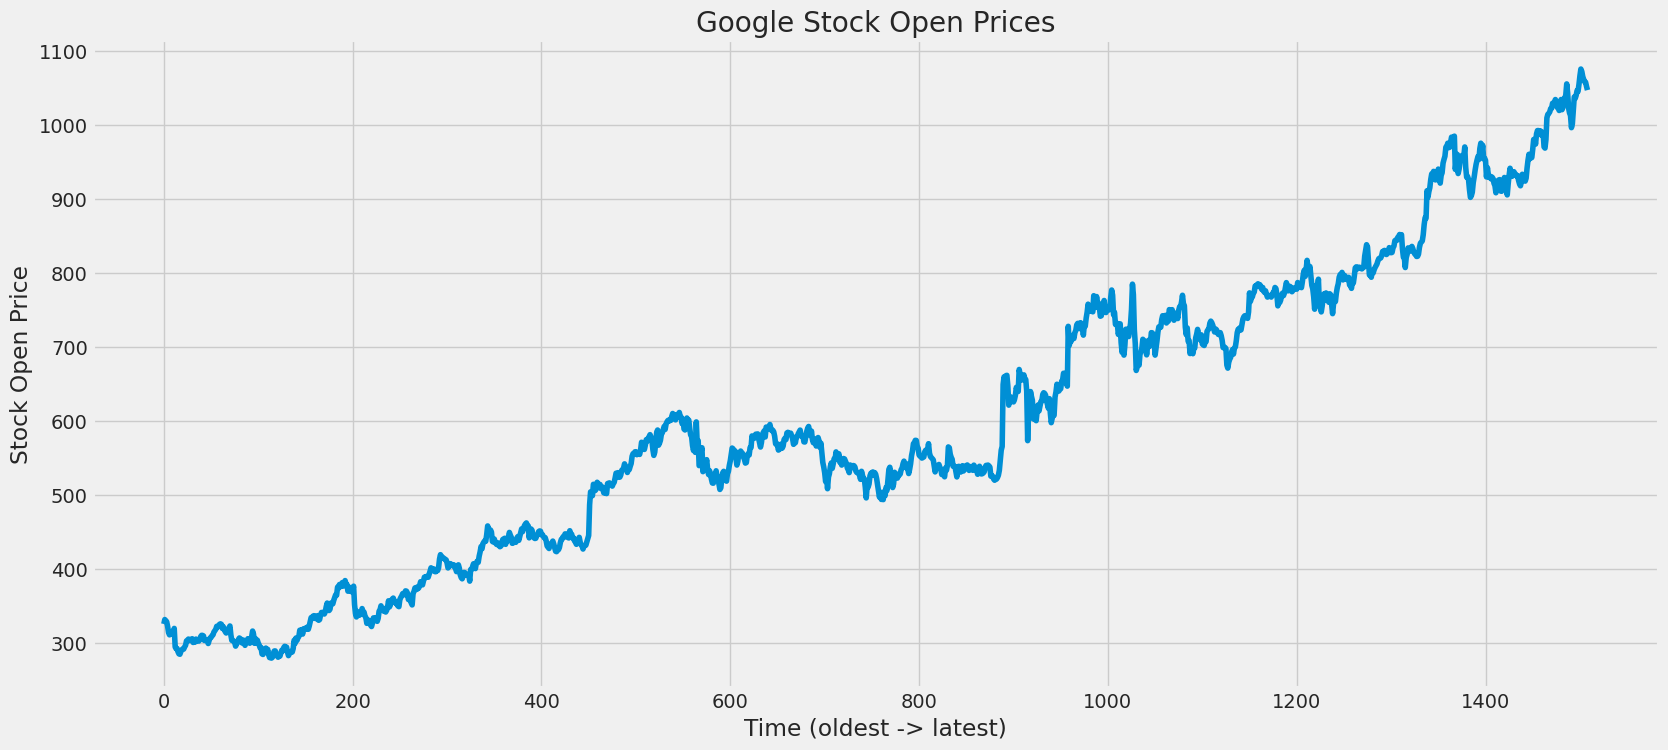

In [23]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

**Feature Scaling**

In [24]:
import os
if os.path.exists('https://mjnvsai.github.io/StockPricePrediction/config.py'):
    print(1)
else:
    print(0)

1


In [25]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

**Steps :**

- taking the reference of past 60 days of data to predict the future stock price.  
- It is observed that taking 60 days of past data gives us best results.  
- In this data set 60 days of data means 3 months of data.  
- Every month as 20 days of Stock price.   
- X train will have data of 60 days prior to our date and y train will have data of one day after our date

In [26]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
X_train.shape

(1449, 60)

In [28]:
y_train.shape

(1449,)

**Data Reshaping**

In [29]:
X_train = np.reshape(X_train, newshape =
                     (X_train.shape[0], X_train.shape[1], 1))

1. Number of stock prices - 1449  
2. Number of time steps - 60  
3. Number of Indicator - 1  

In [30]:
X_train.shape

(1449, 60, 1)

**Model Creation**

In [31]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [32]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

**Model Fitting**

In [33]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 15s 130ms/step - loss: 0.0250
Epoch 2/100
46/46 [==============================] - 6s 129ms/step - loss: 0.0038
Epoch 3/100
46/46 [==============================] - 5s 119ms/step - loss: 0.0034
Epoch 4/100
46/46 [==============================] - 7s 141ms/step - loss: 0.0031
Epoch 5/100
46/46 [==============================] - 5s 117ms/step - loss: 0.0032
Epoch 6/100
46/46 [==============================] - 7s 146ms/step - loss: 0.0026
Epoch 7/100
46/46 [==============================] - 5s 118ms/step - loss: 0.0033
Epoch 8/100
46/46 [==============================] - 8s 177ms/step - loss: 0.0028
Epoch 9/100
46/46 [==============================] - 6s 130ms/step - loss: 0.0029
Epoch 10/100
46/46 [==============================] - 7s 146ms/step - loss: 0.0027
Epoch 11/100
46/46 [==============================] - 6s 120ms/step - loss: 0.0026
Epoch 12/100
46/46 [==============================] - 7s 144ms/step - loss: 0.0029
Epoch 13/100

**Model Evaluation**

In [35]:
dataset_test = pd.read_csv('https://mjnvsai.github.io/StockPricePrediction/Google_Stock_Price_Test.csv')

In [36]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [37]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [38]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [39]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [40]:
len(inputs)

185

In [41]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [42]:
X_test.shape

(125, 60, 1)

**Model Prediction**

In [43]:
predicted_stock_price = regressor.predict(X_test)

4/4 [==============================] - 2s 32ms/step


In [44]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [45]:
predicted_stock_price

array([[1054.465 ],
       [1053.4182],
       [1056.3253],
       [1065.647 ],
       [1077.4407],
       [1088.0067],
       [1095.745 ],
       [1097.4244],
       [1096.8965],
       [1095.5964],
       [1100.4335],
       [1107.5331],
       [1114.3918],
       [1119.2244],
       [1122.8369],
       [1129.5703],
       [1140.4125],
       [1149.6753],
       [1155.3649],
       [1158.0299],
       [1157.3475],
       [1156.1608],
       [1154.5059],
       [1146.0955],
       [1130.4779],
       [1104.7416],
       [1088.698 ],
       [1081.5195],
       [1073.8135],
       [1070.6652],
       [1070.9032],
       [1072.6389],
       [1079.0276],
       [1087.7988],
       [1094.6274],
       [1100.1954],
       [1105.1826],
       [1107.7362],
       [1110.8246],
       [1116.527 ],
       [1119.103 ],
       [1115.9075],
       [1100.8169],
       [1086.6696],
       [1083.6145],
       [1087.7269],
       [1098.4767],
       [1113.5002],
       [1131.2565],
       [1145.9331],


**Result Analysis**

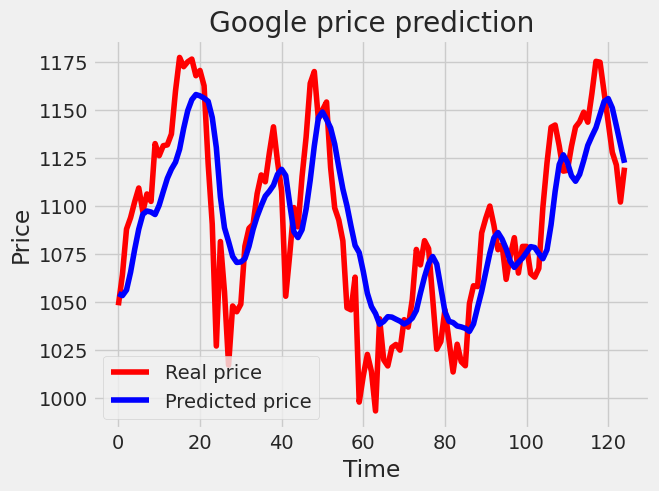

In [46]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

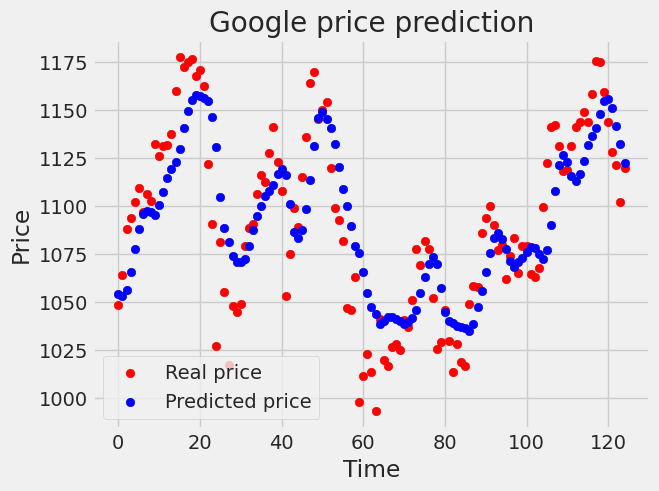

In [60]:
plt.scatter(range(len(real_stock_price)), real_stock_price, color='red', label='Real price')
plt.scatter(range(len(predicted_stock_price)), predicted_stock_price, color='blue', label='Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
